In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
S01_filter_data = pd.read_csv('./filter/S01_filter_HIS164.csv', index_col=0)
S05_filter_data = pd.read_csv('./filter/S05_filter_HIS164.csv', index_col=0)
p12_filter_data = pd.read_csv('./filter/p12_filter_HIS164.csv', index_col=0)
p13_filter_data = pd.read_csv('./filter/p13_filter_HIS164.csv', index_col=0)

S01_corr_data = S01_filter_data.apply(lambda x: x/2)
S05_corr_data = S05_filter_data.apply(lambda x: x/2)
p12_corr_data = p12_filter_data.apply(lambda x: x/2)
p13_corr_data = p13_filter_data.apply(lambda x: x/2)

S01_sort_data = S01_corr_data.sort_values(by=['HIS_164'], ascending=False)
S05_sort_data = S05_corr_data.sort_values(by=['HIS_164'], ascending=False)
p12_sort_data = p12_corr_data.sort_values(by=['HIS_164'], ascending=False)
p13_sort_data = p13_corr_data.sort_values(by=['HIS_164'], ascending=False)

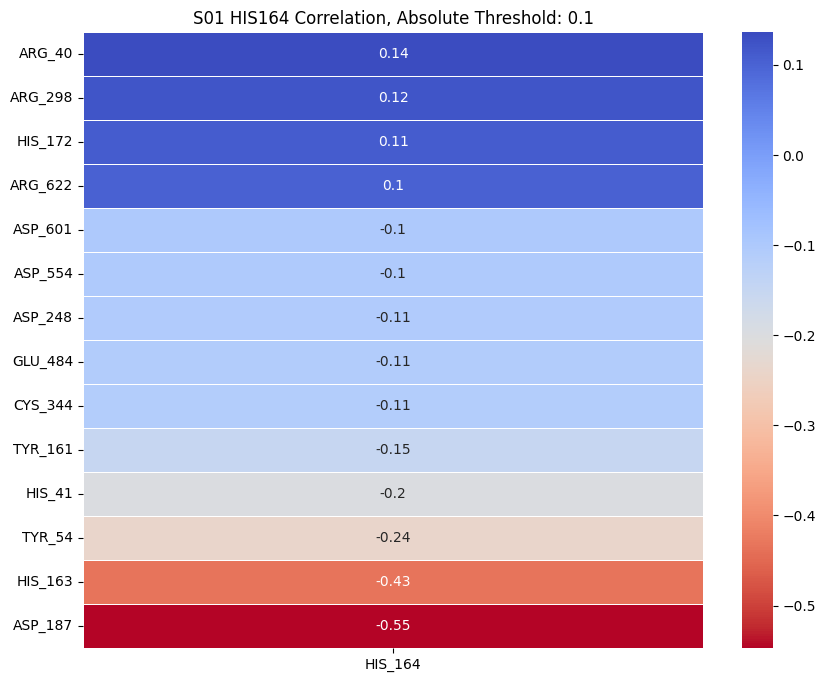

In [3]:
plt.figure(figsize=(10, 8))
plot = sns.heatmap(S01_sort_data, linewidths=0.5, cmap='coolwarm_r', annot=True)
plt.title('S01 HIS164 Correlation, Absolute Threshold: 0.1')
plt.savefig('./figure/HIS_164/S01_0.1_reverse.png')
plt.show()

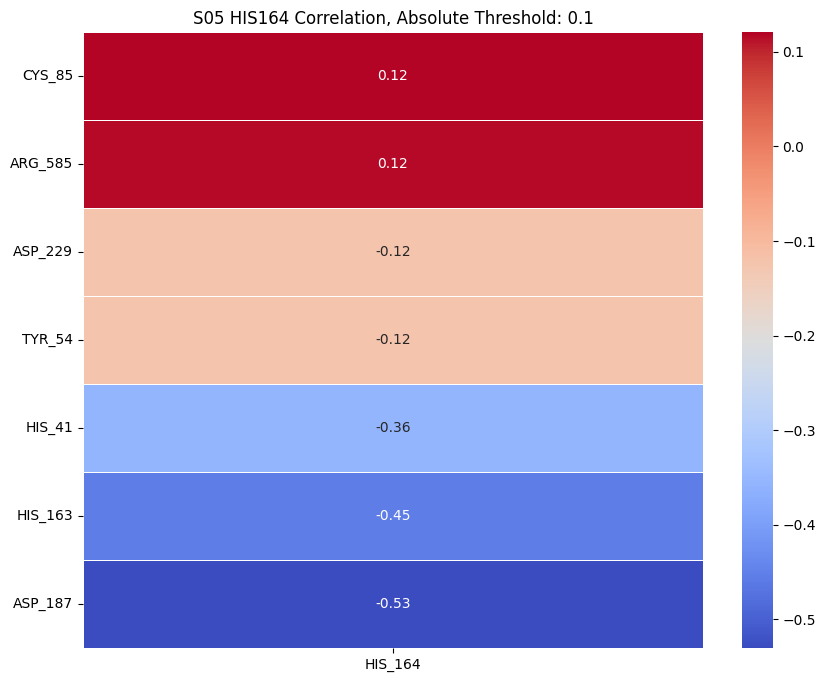

In [72]:
plt.figure(figsize=(10, 8))
plot = sns.heatmap(S05_sort_data, linewidths=0.5, cmap='coolwarm', annot=True)
plt.title('S05 HIS164 Correlation, Absolute Threshold: 0.1')
plt.yticks(rotation=360)
plt.savefig('./figure/HIS_164/S05_0.1.png')
plt.show()

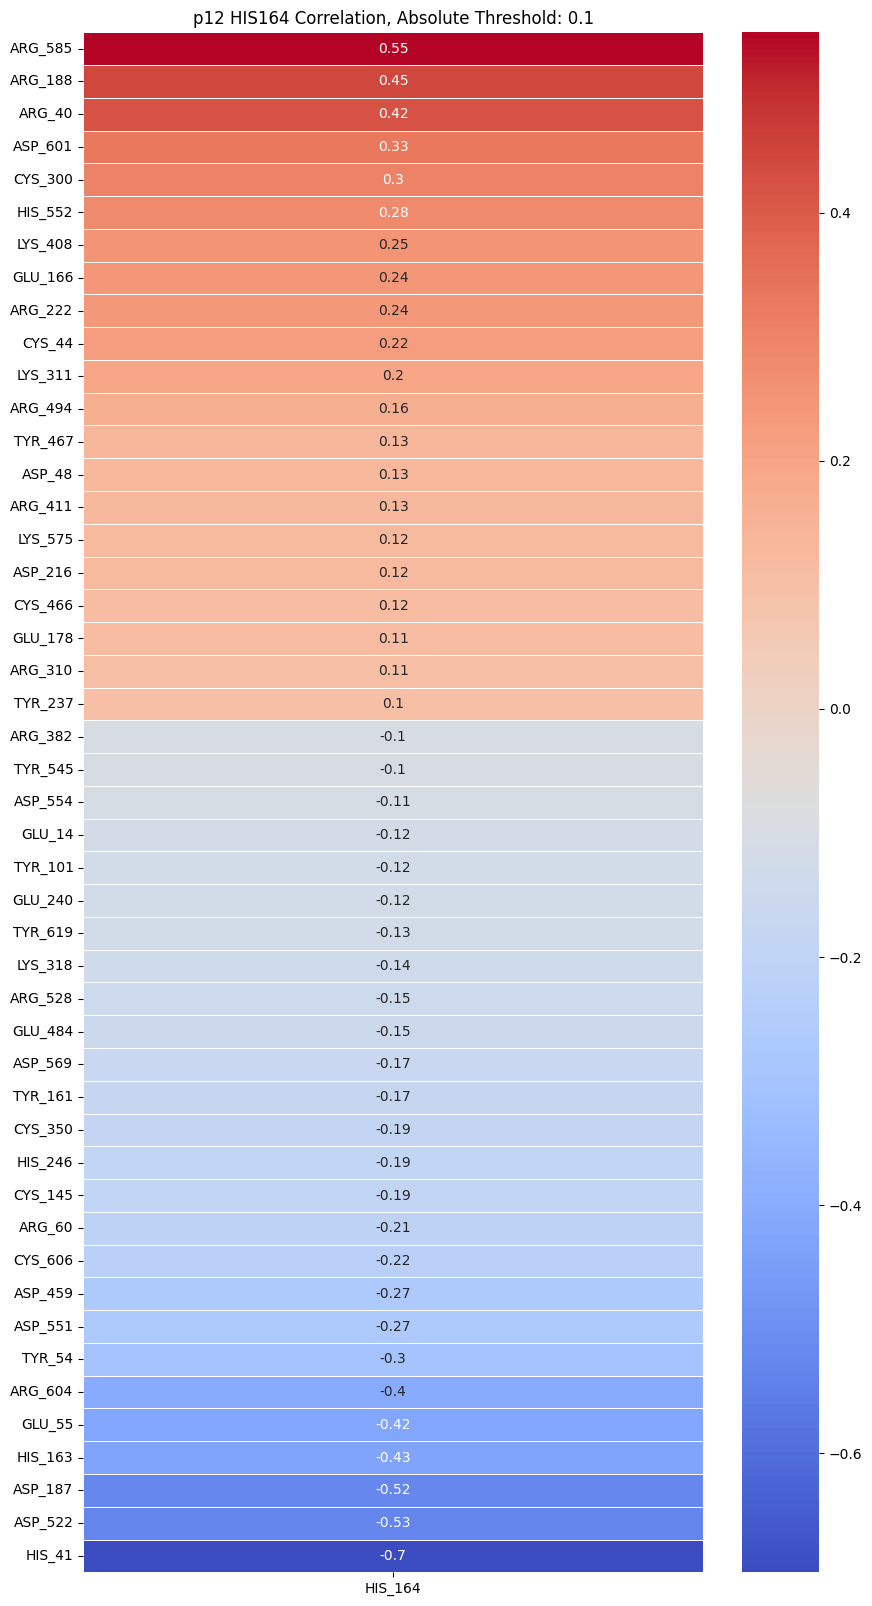

In [49]:
plt.figure(figsize=(10, 20))
plot = sns.heatmap(p12_sort_data, linewidths=0.5, cmap='coolwarm', annot=True)
plt.title('p12 HIS164 Correlation, Absolute Threshold: 0.1')
plt.show()

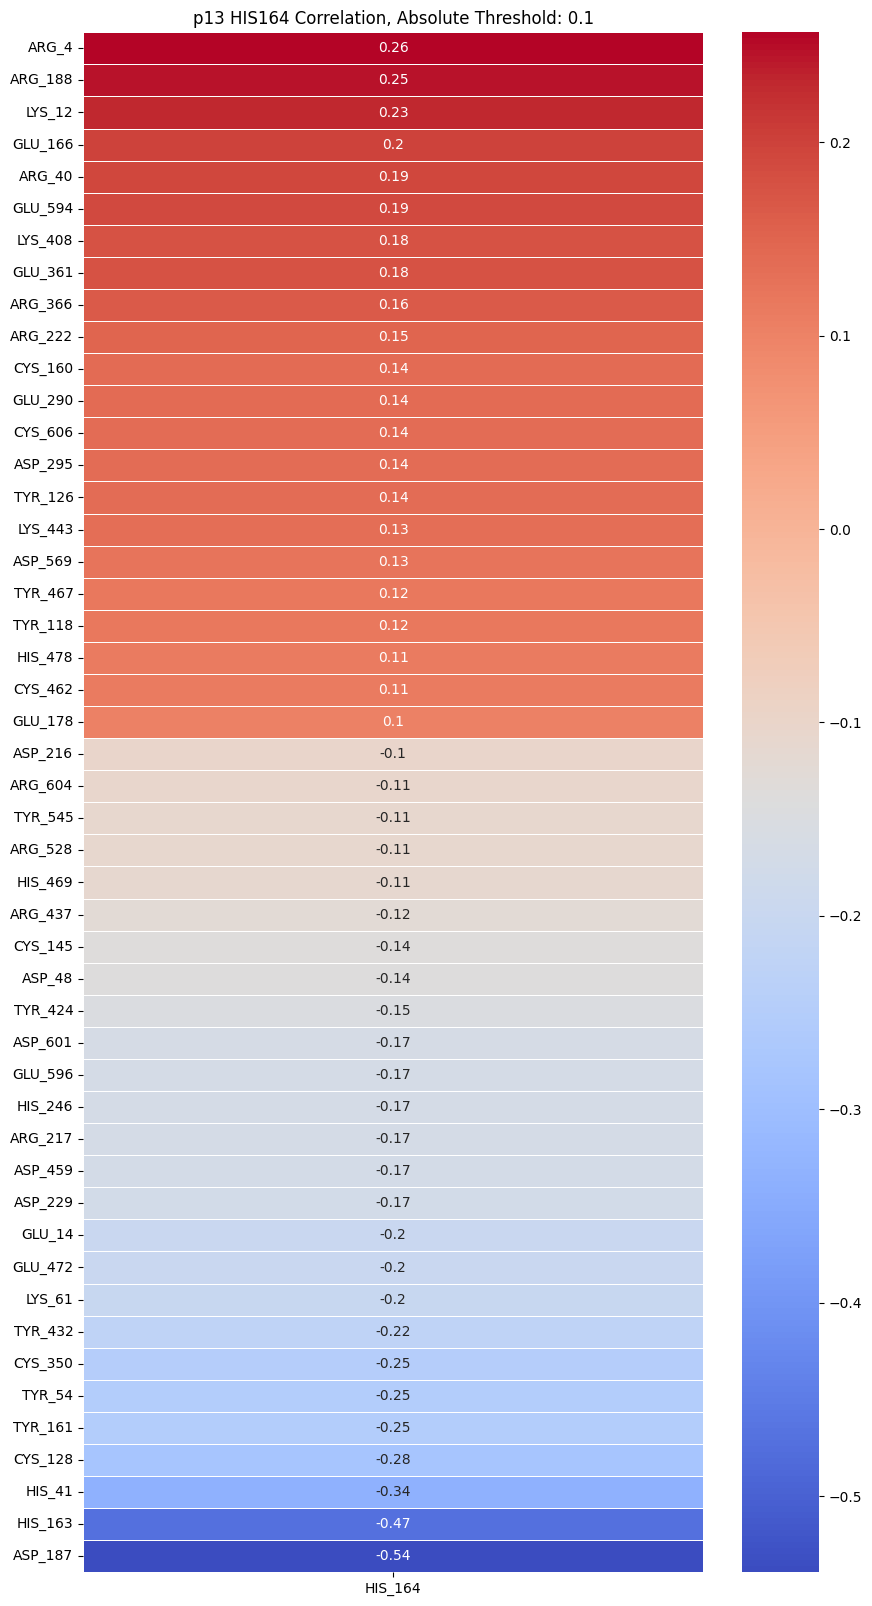

In [50]:
plt.figure(figsize=(10, 20))
plot = sns.heatmap(p13_sort_data, linewidths=0.5, cmap='coolwarm', annot=True)
plt.title('p13 HIS164 Correlation, Absolute Threshold: 0.1')
plt.show()

* Adjust the threshold to make p12 and p13's heatmaps smaller.

In [66]:
p12_pos_data = p12_sort_data[p12_sort_data['HIS_164'] >= 0.3]
p12_neg_data = p12_sort_data[p12_sort_data['HIS_164'] <= -0.3]
p12_bind_data = pd.concat([p12_pos_data, p12_neg_data])

p13_pos_data = p13_sort_data[p13_sort_data['HIS_164'] >= 0.2]
p13_neg_data = p13_sort_data[p13_sort_data['HIS_164'] <= -0.2]
p13_bind_data = pd.concat([p13_pos_data, p13_neg_data])

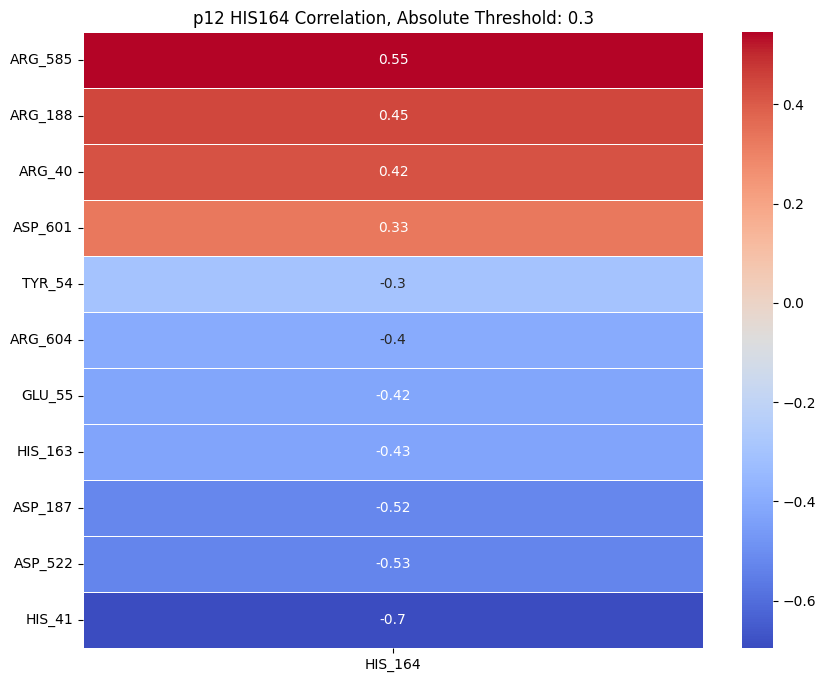

In [73]:
plt.figure(figsize=(10, 8))
plot = sns.heatmap(p12_bind_data, linewidths=0.5, cmap='coolwarm', annot=True)
plt.title('p12 HIS164 Correlation, Absolute Threshold: 0.3')
plt.savefig('./figure/HIS_164/p12_0.3.png')
plt.show()

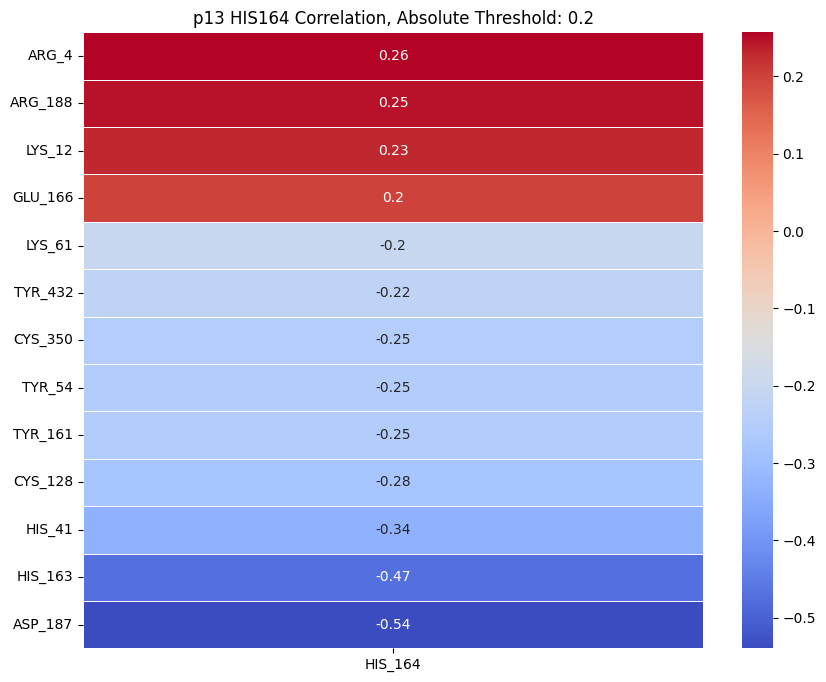

In [74]:
plt.figure(figsize=(10, 8))
plot = sns.heatmap(p13_bind_data, linewidths=0.5, cmap='coolwarm', annot=True)
plt.title('p13 HIS164 Correlation, Absolute Threshold: 0.2')
plt.savefig('./figure/HIS_164/p13_0.2.png')
plt.show()

In [15]:
# path names
root = Path().resolve()
path = root/'dataset'/'Henry_Mpro_pKa'

# the function to read data
def read_data(name):
    table_data = pd.DataFrame({})
    dataset_path = path/name
    for dp in dataset_path.iterdir():
        # structure.pdb does not need to be read here
        if dp.name != 'structure.pdb':
            temp_table = pd.read_table(dp, header=None, names=['#1', '#2'])
            temp_array = (list)(temp_table['#2'])
            table_data[dp.name] = temp_array
            warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
    return table_data

In [16]:
S01_table = read_data(name='S01')
S02_table = read_data(name='S02')
S03_table = read_data(name='S03')
S04_table = read_data(name='S04')
S05_table = read_data(name='S05')
S06_table = read_data(name='S06')
S07_table = read_data(name='S07')
S08_table = read_data(name='S08')
S09_table = read_data(name='S09')
S10_table = read_data(name='S10')
S11_table = read_data(name='S11')
p12_table = read_data(name='p12')
p13_table = read_data(name='p13')

In [5]:
S01_residues = list(S01_table)
S02_residues = list(S02_table)
S03_residues = list(S03_table)
S04_residues = list(S04_table)
S05_residues = list(S05_table)
S06_residues = list(S06_table)
S07_residues = list(S07_table)
S08_residues = list(S08_table)
S09_residues = list(S09_table)
S10_residues = list(S10_table)
S11_residues = list(S11_table)
p12_residues = list(p12_table)
p13_residues = list(p13_table)

In [6]:
S01_S02_same = [x for x in S01_residues if x in S02_residues]
S01_S03_same = [x for x in S01_residues if x in S03_residues]
S01_S04_same = [x for x in S01_residues if x in S04_residues]
S01_S05_same = [x for x in S01_residues if x in S05_residues]
S01_S06_same = [x for x in S01_residues if x in S06_residues]
S01_S07_same = [x for x in S01_residues if x in S07_residues]
S01_S08_same = [x for x in S01_residues if x in S08_residues]
S01_S09_same = [x for x in S01_residues if x in S09_residues]
S01_S10_same = [x for x in S01_residues if x in S10_residues]
S01_S11_same = [x for x in S01_residues if x in S11_residues]
S01_p12_same = [x for x in S01_residues if x in p12_residues]
S01_p13_same = [x for x in S01_residues if x in p13_residues]

In [49]:
print((S01_S02_same==S01_S03_same) & (S01_S03_same==S01_S04_same) & (S01_S04_same==S01_S05_same)
& (S01_S05_same==S01_S06_same) & (S01_S06_same==S01_S07_same) & (S01_S07_same==S01_S08_same)
& (S01_S08_same==S01_S09_same) & (S01_S09_same==S01_S10_same) & (S01_S10_same==S01_S11_same)
& (S01_S11_same==S01_p12_same) & (S01_p12_same==S01_p13_same))

True


In [8]:
same_residues = S01_S02_same
print(len(same_residues))

156


In [9]:
S01_special = list(set(S01_residues).difference(set(same_residues)))
S02_special = list(set(S02_residues).difference(set(same_residues)))
S03_special = list(set(S03_residues).difference(set(same_residues)))
S04_special = list(set(S04_residues).difference(set(same_residues)))
S05_special = list(set(S05_residues).difference(set(same_residues)))
S06_special = list(set(S06_residues).difference(set(same_residues)))
S07_special = list(set(S07_residues).difference(set(same_residues)))
S08_special = list(set(S08_residues).difference(set(same_residues)))
S09_special = list(set(S09_residues).difference(set(same_residues)))
S10_special = list(set(S10_residues).difference(set(same_residues)))
S11_special = list(set(S11_residues).difference(set(same_residues)))
p12_special = list(set(p12_residues).difference(set(same_residues)))
p13_special = list(set(p13_residues).difference(set(same_residues)))
print("Special residues of S01:", S01_special)
print("Special residues of S02:", S02_special)
print("Special residues of S03:", S03_special)
print("Special residues of S04:", S04_special)
print("Special residues of S05:", S05_special)
print("Special residue of S06:", S06_special)
print("Special residues of S07:", S07_special)
print("Special residues of S08:", S08_special)
print("Special residue of S09:", S09_special)
print("Special residues of S10:", S10_special)
print("Special residues of S11:", S11_special)
print("Special residues of p12:", p12_special)
print("Special residues of p13:", p13_special)

Special residues of S01: ['LYS_623', 'ARG_622']
Special residues of S02: ['ARG_623', 'LYS_622']
Special residues of S03: ['LYS_620', 'LYS_613', 'ASP_623']
Special residues of S04: ['ARG_614', 'GLU_623']
Special residues of S05: ['LYS_616', 'GLU_621']
Special residue of S06: ['ARG_616']
Special residues of S07: ['GLU_614', 'ASP_621', 'ARG_613']
Special residues of S08: ['HIS_614', 'CYS_623']
Special residue of S09: ['GLU_620']
Special residues of S10: ['GLU_621', 'ARG_616']
Special residues of S11: ['LYS_616', 'TYR_614']
Special residues of p12: ['TYR_619', 'LYS_613', 'TYR_614', 'TYR_623']
Special residues of p13: ['LYS_613', 'TYR_614']


In [10]:
# the function to perform pearson correlation analysis
def get_high_corr_features(table):
    corr_matrix = table.corr(method='pearson')
    threshold = 0.8

    corr_pairs = corr_matrix.stack().reset_index()
    corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
    corr_features = corr_pairs[
        (corr_pairs['Correlation'].abs() > threshold) &
        (corr_pairs['Feature1'] != corr_pairs['Feature2'])
    ].sort_values(by='Correlation', ascending=False).drop_duplicates(subset=['Correlation'])

    feature_1_array = (list)(corr_features['Feature1'])
    feature_2_array = (list)(corr_features['Feature2'])

    high_features_array = list(set(feature_1_array + feature_2_array))

    return corr_matrix, corr_features, high_features_array

In [11]:
S01_corr_matrix, S01_corr_features, S01_high_features_array = get_high_corr_features(S01_table)

In [12]:
# compute high-correlation matrix
def compute_hc_matrix(data_table, high_features_array):

    high_corr_df = data_table[high_features_array]
    high_corr_matrix = high_corr_df.corr(method='pearson')

    return high_corr_df, high_corr_matrix

In [13]:
S01_hc_df, S01_hc_matrix = compute_hc_matrix(S01_table, S01_high_features_array)

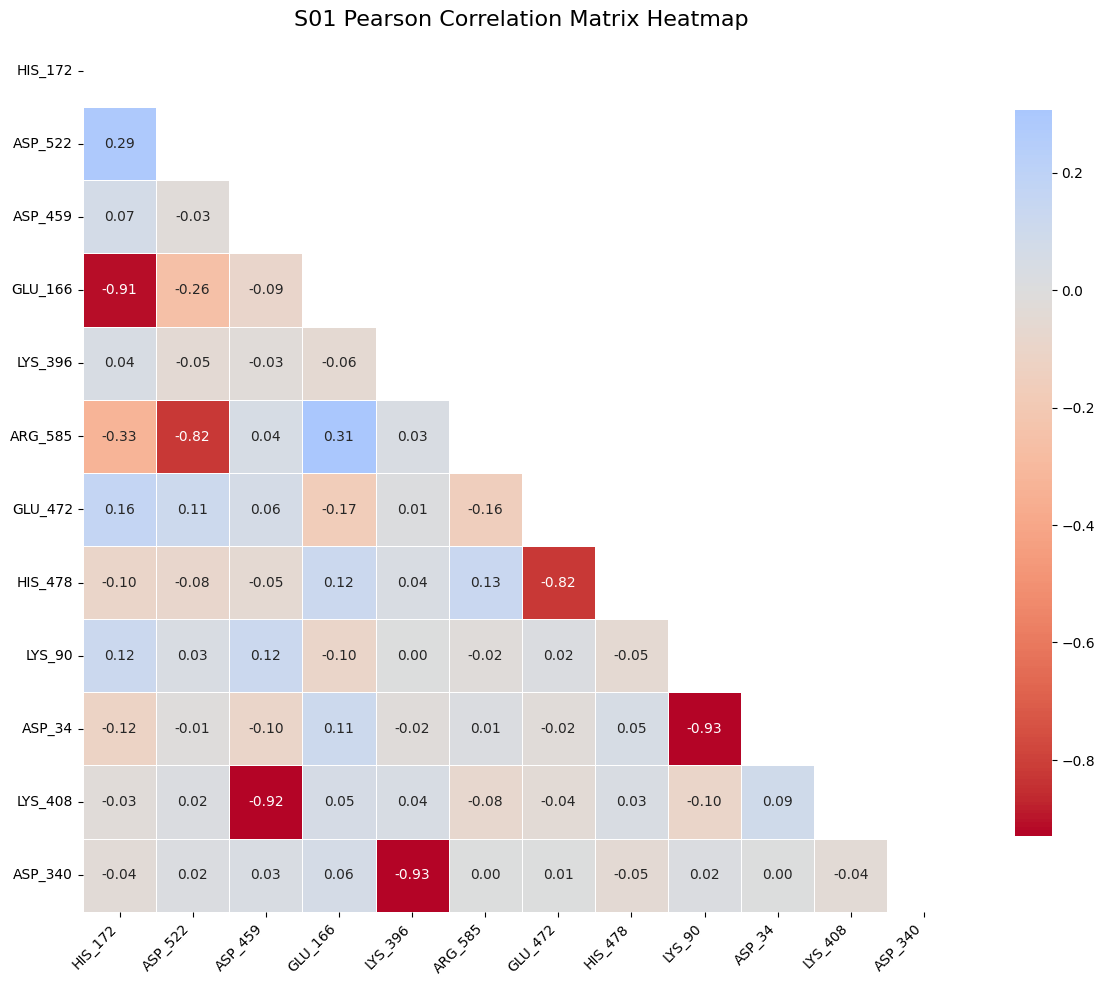

In [11]:
# visualize the matrix using the heatmap
plt.figure(figsize=(12, 10))
# cover upper part
mask = np.triu(np.ones_like(S01_hc_matrix, dtype=bool))
labels = S01_hc_matrix.map(lambda v: v if v else '')
heatmap = sns.heatmap(S01_hc_matrix, mask=mask, annot=labels, fmt='.2f',
                      cmap='coolwarm_r', center=0, square=True, linewidths=.5,
                      cbar_kws={"shrink": .8})

plt.title('S01 Pearson Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('./figure/thesis_plot/S01_matrix_heatmap.png')
plt.show()

In [14]:
S02_corr_matrix, S02_corr_features, S02_high_features_array = get_high_corr_features(S02_table)
S03_corr_matrix, S03_corr_features, S03_high_features_array = get_high_corr_features(S03_table)
S04_corr_matrix, S04_corr_features, S04_high_features_array = get_high_corr_features(S04_table)
S05_corr_matrix, S05_corr_features, S05_high_features_array = get_high_corr_features(S05_table)
S06_corr_matrix, S06_corr_features, S06_high_features_array = get_high_corr_features(S06_table)
S07_corr_matrix, S07_corr_features, S07_high_features_array = get_high_corr_features(S07_table)
S08_corr_matrix, S08_corr_features, S08_high_features_array = get_high_corr_features(S08_table)
S09_corr_matrix, S09_corr_features, S09_high_features_array = get_high_corr_features(S09_table)
S10_corr_matrix, S10_corr_features, S10_high_features_array = get_high_corr_features(S10_table)
S11_corr_matrix, S11_corr_features, S11_high_features_array = get_high_corr_features(S11_table)
p12_corr_matrix, p12_corr_features, p12_high_features_array = get_high_corr_features(p12_table)
p13_corr_matrix, p13_corr_features, p13_high_features_array = get_high_corr_features(p13_table)

S02_hc_df, S02_hc_matrix = compute_hc_matrix(S02_table, S02_high_features_array)
S03_hc_df, S03_hc_matrix = compute_hc_matrix(S03_table, S03_high_features_array)
S04_hc_df, S04_hc_matrix = compute_hc_matrix(S04_table, S04_high_features_array)
S05_hc_df, S05_hc_matrix = compute_hc_matrix(S05_table, S05_high_features_array)
S06_hc_df, S06_hc_matrix = compute_hc_matrix(S06_table, S06_high_features_array)
S07_hc_df, S07_hc_matrix = compute_hc_matrix(S07_table, S07_high_features_array)
S08_hc_df, S08_hc_matrix = compute_hc_matrix(S08_table, S08_high_features_array)
S09_hc_df, S09_hc_matrix = compute_hc_matrix(S09_table, S09_high_features_array)
S10_hc_df, S10_hc_matrix = compute_hc_matrix(S10_table, S10_high_features_array)
S11_hc_df, S11_hc_matrix = compute_hc_matrix(S11_table, S11_high_features_array)
p12_hc_df, p12_hc_matrix = compute_hc_matrix(p12_table, p12_high_features_array)
p13_hc_df, p13_hc_matrix = compute_hc_matrix(p13_table, p13_high_features_array)

In [14]:
S02_corr_features

,Feature1,Feature2,Correlation
15434,GLU_472,HIS_478,-0.857389
10529,ASP_153,LYS_102,-0.863689
6274,ASP_34,LYS_90,-0.931149
18950,LYS_396,ASP_340,-0.931516


In [15]:
S03_corr_features

,Feature1,Feature2,Correlation
3932,LYS_406,ASP_461,-0.805027
2129,LYS_542,TYR_543,-0.818844
21601,ASP_155,LYS_100,-0.822993
15371,GLU_472,HIS_478,-0.844867
3008,ASP_459,LYS_408,-0.883061
18909,LYS_396,ASP_340,-0.923312
6153,ASP_34,LYS_90,-0.941926
10435,ASP_153,LYS_102,-0.961508


In [16]:
S04_corr_features

,Feature1,Feature2,Correlation
7514,ASP_522,ARG_585,-0.800677
2991,ASP_459,LYS_408,-0.807191
21625,ASP_155,LYS_100,-0.814349
15434,GLU_472,HIS_478,-0.848682
19108,LYS_396,ASP_340,-0.929454
6116,ASP_34,LYS_90,-0.933726
10529,ASP_153,LYS_102,-0.947158


In [17]:
S05_corr_features

,Feature1,Feature2,Correlation
15434,GLU_472,HIS_478,-0.825217
18949,LYS_396,ASP_340,-0.934759
6274,ASP_34,LYS_90,-0.936640
2990,ASP_459,LYS_408,-0.948281


In [18]:
S06_corr_features

,Feature1,Feature2,Correlation
2103,LYS_542,TYR_543,-0.806432
7467,ASP_522,ARG_585,-0.814932
14162,ARG_366,ASP_362,-0.820892
21331,ASP_155,LYS_100,-0.834131
3885,LYS_406,ASP_461,-0.837842
2972,ASP_459,LYS_408,-0.887082
10306,ASP_153,LYS_102,-0.893123
6078,ASP_34,LYS_90,-0.922546
18830,LYS_396,ASP_340,-0.938376


In [19]:
S07_corr_features

,Feature1,Feature2,Correlation
9988,HIS_172,GLU_166,-0.821920
15691,GLU_472,HIS_478,-0.823446
4093,LYS_406,ASP_461,-0.831065
19229,LYS_396,ASP_340,-0.926985
6314,ASP_34,LYS_90,-0.933746
3169,ASP_459,LYS_408,-0.943691


In [20]:
S08_corr_features

,Feature1,Feature2,Correlation
2117,LYS_542,TYR_543,-0.803971
15593,GLU_472,HIS_478,-0.830198
21625,ASP_155,LYS_100,-0.836822
2991,ASP_459,LYS_408,-0.875464
9926,HIS_172,GLU_166,-0.881891
19108,LYS_396,ASP_340,-0.933028
6117,ASP_34,LYS_90,-0.935822
10688,ASP_153,LYS_102,-0.939606


In [21]:
S09_corr_features

,Feature1,Feature2,Correlation
6834,TYR_237,LYS_236,-0.824266
15180,GLU_472,HIS_478,-0.834356
2972,ASP_459,LYS_408,-0.838023
10305,ASP_153,LYS_102,-0.865847
9706,HIS_172,GLU_166,-0.908449
6078,ASP_34,LYS_90,-0.925886
18830,LYS_396,ASP_340,-0.929135


In [22]:
S10_corr_features

,Feature1,Feature2,Correlation
4068,LYS_406,ASP_461,-0.804145
15593,GLU_472,HIS_478,-0.835936
6275,ASP_34,LYS_90,-0.916585
2991,ASP_459,LYS_408,-0.919216
19108,LYS_396,ASP_340,-0.930480


In [23]:
S11_corr_features

,Feature1,Feature2,Correlation
922,LYS_394,TYR_343,-0.801678
21464,LYS_100,ASP_155,-0.807315
15275,GLU_472,HIS_478,-0.808070
18352,ASP_461,LYS_406,-0.811906
9809,TYR_543,LYS_542,-0.830468
5145,ASP_362,ARG_366,-0.860465
15865,LYS_102,ASP_153,-0.900583
18791,LYS_396,ASP_340,-0.925226
17576,LYS_90,ASP_34,-0.928532
2990,ASP_459,LYS_408,-0.955901


In [24]:
p12_corr_features

,Feature1,Feature2,Correlation
15468,GLU_472,HIS_478,-0.807500
15301,ARG_188,GLU_55,-0.826638
9889,HIS_172,GLU_166,-0.857114
10500,ASP_153,LYS_102,-0.878628
7607,ASP_522,ARG_585,-0.904102
6192,ASP_34,LYS_90,-0.928381
19188,LYS_396,ASP_340,-0.934194
3027,ASP_459,LYS_408,-0.951935


In [25]:
p13_corr_features

,Feature1,Feature2,Correlation
15275,GLU_472,HIS_478,-0.811433
18791,LYS_396,ASP_340,-0.928193
10370,ASP_153,LYS_102,-0.931525
6115,ASP_34,LYS_90,-0.936179
2990,ASP_459,LYS_408,-0.951702


In [15]:
def filter_extract_corr(sub_matrix, resi):
    resi_column = sub_matrix.loc[resi]
    resi_data = pd.DataFrame(resi_column)

    # filter low correlation values
    for row in resi_data.iterrows():
        warnings.simplefilter(action='ignore', category=FutureWarning)
        test_value = float(row[1])
        if test_value < 0.1 and test_value > -0.1:
            resi_data.drop(row[0], inplace=True)

    resi_clean_data = resi_data.drop(resi)
    return resi_clean_data

In [16]:
S01_filter_HIS164_data = filter_extract_corr(S01_corr_matrix, resi='HIS_164')
S02_filter_HIS164_data = filter_extract_corr(S02_corr_matrix, resi='HIS_164')
S03_filter_HIS164_data = filter_extract_corr(S03_corr_matrix, resi='HIS_164')
S04_filter_HIS164_data = filter_extract_corr(S04_corr_matrix, resi='HIS_164')
S05_filter_HIS164_data = filter_extract_corr(S05_corr_matrix, resi='HIS_164')
S06_filter_HIS164_data = filter_extract_corr(S06_corr_matrix, resi='HIS_164')
S07_filter_HIS164_data = filter_extract_corr(S07_corr_matrix, resi='HIS_164')
S08_filter_HIS164_data = filter_extract_corr(S08_corr_matrix, resi='HIS_164')
S09_filter_HIS164_data = filter_extract_corr(S09_corr_matrix, resi='HIS_164')
S10_filter_HIS164_data = filter_extract_corr(S10_corr_matrix, resi='HIS_164')
S11_filter_HIS164_data = filter_extract_corr(S11_corr_matrix, resi='HIS_164')
p12_filter_HIS164_data = filter_extract_corr(p12_corr_matrix, resi='HIS_164')
p13_filter_HIS164_data = filter_extract_corr(p13_corr_matrix, resi='HIS_164')

In [17]:
S01_filter_HIS164_data

,HIS_164
CYS_344,-0.111238
HIS_172,0.112101
TYR_54,-0.239086
ARG_298,0.122031
ARG_40,0.136191
HIS_163,-0.434800
GLU_484,-0.107326
ASP_601,-0.100099
ASP_187,-0.547463
ASP_554,-0.102882


In [6]:
S01_corr_data = pd.read_csv('./processed/correlation/S01_filtered_data.csv')
S02_corr_data = pd.read_csv('./processed/correlation/S02_filtered_data.csv')
S03_corr_data = pd.read_csv('./processed/correlation/S03_filtered_data.csv')
S04_corr_data = pd.read_csv('./processed/correlation/S04_filtered_data.csv')
S05_corr_data = pd.read_csv('./processed/correlation/S05_filtered_data.csv')
S06_corr_data = pd.read_csv('./processed/correlation/S06_filtered_data.csv')
S07_corr_data = pd.read_csv('./processed/correlation/S07_filtered_data.csv')
S08_corr_data = pd.read_csv('./processed/correlation/S08_filtered_data.csv')
S09_corr_data = pd.read_csv('./processed/correlation/S09_filtered_data.csv')
S10_corr_data = pd.read_csv('./processed/correlation/S10_filtered_data.csv')
S11_corr_data = pd.read_csv('./processed/correlation/S11_filtered_data.csv')
p12_corr_data = pd.read_csv('./processed/correlation/p12_filtered_data.csv')
p13_corr_data = pd.read_csv('./processed/correlation/p13_filtered_data.csv')

In [10]:
S01_corr_data['Substrate'] = 'S01'
S02_corr_data['Substrate'] = 'S02'
S03_corr_data['Substrate'] = 'S03'
S04_corr_data['Substrate'] = 'S04'
S05_corr_data['Substrate'] = 'S05'
S06_corr_data['Substrate'] = 'S06'
S07_corr_data['Substrate'] = 'S07'
S08_corr_data['Substrate'] = 'S08'
S09_corr_data['Substrate'] = 'S09'
S10_corr_data['Substrate'] = 'S10'
S11_corr_data['Substrate'] = 'S11'
p12_corr_data['Substrate'] = 'p12'
p13_corr_data['Substrate'] = 'p13'

In [15]:
corr_data = [S01_corr_data, S02_corr_data, S03_corr_data, S04_corr_data,
             S05_corr_data, S06_corr_data, S07_corr_data, S08_corr_data,
             S09_corr_data, S10_corr_data, S11_corr_data, p12_corr_data,
             p13_corr_data]

merge_corr_data = pd.concat(corr_data, ignore_index=True)

In [35]:
res1_list = list(merge_corr_data['Feature1'])
res2_list = list(merge_corr_data['Feature2'])

for i in range(len(res1_list)):
    temp_res1 = res1_list[i]
    temp_res2 = res2_list[i]
    temp_order1 = int(temp_res1[4:])
    temp_order2 = int(temp_res2[4:])
    if temp_order2 < temp_order1:
        res1_list[i] = temp_res2
        res2_list[i] = temp_res1

In [40]:
sort_corr_data = merge_corr_data[['Correlation', 'Substrate']]
sort_corr_data.insert(0, 'Residue_1', res1_list)
sort_corr_data.insert(1, 'Residue_2', res2_list)

In [42]:
sort_corr_data.to_csv('./processed/correlation/sort_correlation_data.csv', index=False)

In [2]:
def read_process_data(file, substrate):
    up_path = './filter/'
    path = up_path + file
    raw_data = pd.read_csv(path)
    raw_data['Substrate'] = substrate
    df = raw_data.rename(columns={'Unnamed: 0': 'Residue'})
    return df


S01_HIS164 = read_process_data('S01_filter_HIS164.csv', 'S01')
S02_HIS164 = read_process_data('S02_filter_HIS164.csv', 'S02')
S03_HIS164 = read_process_data('S03_filter_HIS164.csv', 'S03')
S04_HIS164 = read_process_data('S04_filter_HIS164.csv', 'S04')
S05_HIS164 = read_process_data('S05_filter_HIS164.csv', 'S05')
S06_HIS164 = read_process_data('S06_filter_HIS164.csv', 'S06')
S07_HIS164 = read_process_data('S07_filter_HIS164.csv', 'S07')
S08_HIS164 = read_process_data('S08_filter_HIS164.csv', 'S08')
S09_HIS164 = read_process_data('S09_filter_HIS164.csv', 'S09')
S10_HIS164 = read_process_data('S10_filter_HIS164.csv', 'S10')
S11_HIS164 = read_process_data('S11_filter_HIS164.csv', 'S11')
p12_HIS164 = read_process_data('p12_filter_HIS164.csv', 'p12')
p13_HIS164 = read_process_data('p13_filter_HIS164.csv', 'p13')

In [9]:
HIS164_data = [S01_HIS164, S02_HIS164, S03_HIS164, S04_HIS164,
               S05_HIS164, S06_HIS164, S07_HIS164, S08_HIS164,
               S09_HIS164, S10_HIS164, S11_HIS164, p12_HIS164,
               p13_HIS164]

HIS164_merge = pd.concat(HIS164_data, ignore_index=True)
HIS164_corr_merge = HIS164_merge
HIS164_corr = HIS164_merge['HIS_164'].apply(lambda x: x/2)
HIS164_corr_merge['HIS_164'] = HIS164_corr

In [11]:
HIS164_corr_merge.to_csv('./filter/HIS164_filter_corr.csv', index=False)

In [23]:
S01_residue_list = list(S01_HIS164['Residue'])

S01_data = S01_table[S01_residue_list]
HIS164_data = list(S01_table['HIS_164'])
HIS164_target = [[element] for element in HIS164_data]

x_train, x_test, y_train, y_test = train_test_split(S01_data, HIS164_target, random_state=42)
S01_HIS164_model = LinearRegression()
S01_HIS164_model.fit(x_train, y_train)

LinearRegression()

In [37]:
raw_coef = S01_HIS164_model.coef_
raw_intercept = S01_HIS164_model.intercept_

HIS164_coef = list(raw_coef[0])
HIS164_intercept = raw_intercept[0]

In [31]:
HIS164_predict = S01_HIS164_model.predict(x_test)
HIS164_mse = mean_squared_error(y_test, HIS164_predict)

In [40]:
HIS164_lr_result = pd.DataFrame({'Residue': S01_residue_list,
                                 'Coefficients': HIS164_coef,
                                 'Intercept': HIS164_intercept,
                                 'Main Squared Error': HIS164_mse})

In [41]:
HIS164_lr_result

,Residue,Coefficients,Intercept,Main Squared Error
0,CYS_344,-0.039258,11.792845,0.190876
1,HIS_172,-0.032107,11.792845,0.190876
2,TYR_54,-0.109945,11.792845,0.190876
3,ARG_298,0.044884,11.792845,0.190876
4,ARG_40,-0.031651,11.792845,0.190876
5,HIS_163,-0.257787,11.792845,0.190876
6,GLU_484,-0.077156,11.792845,0.190876
7,ASP_601,-0.000596,11.792845,0.190876
8,ASP_187,-0.537958,11.792845,0.190876
9,ASP_554,-0.138342,11.792845,0.190876
